In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#### In this the dataset we had the columns were separated by semicolon so i have used sep to distinguish between various properties 

In [144]:
df = pd.read_csv('winequality-white.csv',sep=';')

In [145]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [147]:
# 1. Summary Statistics
print("Summary Statistics:")
stats = df.describe()
print(stats)

Summary Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000          

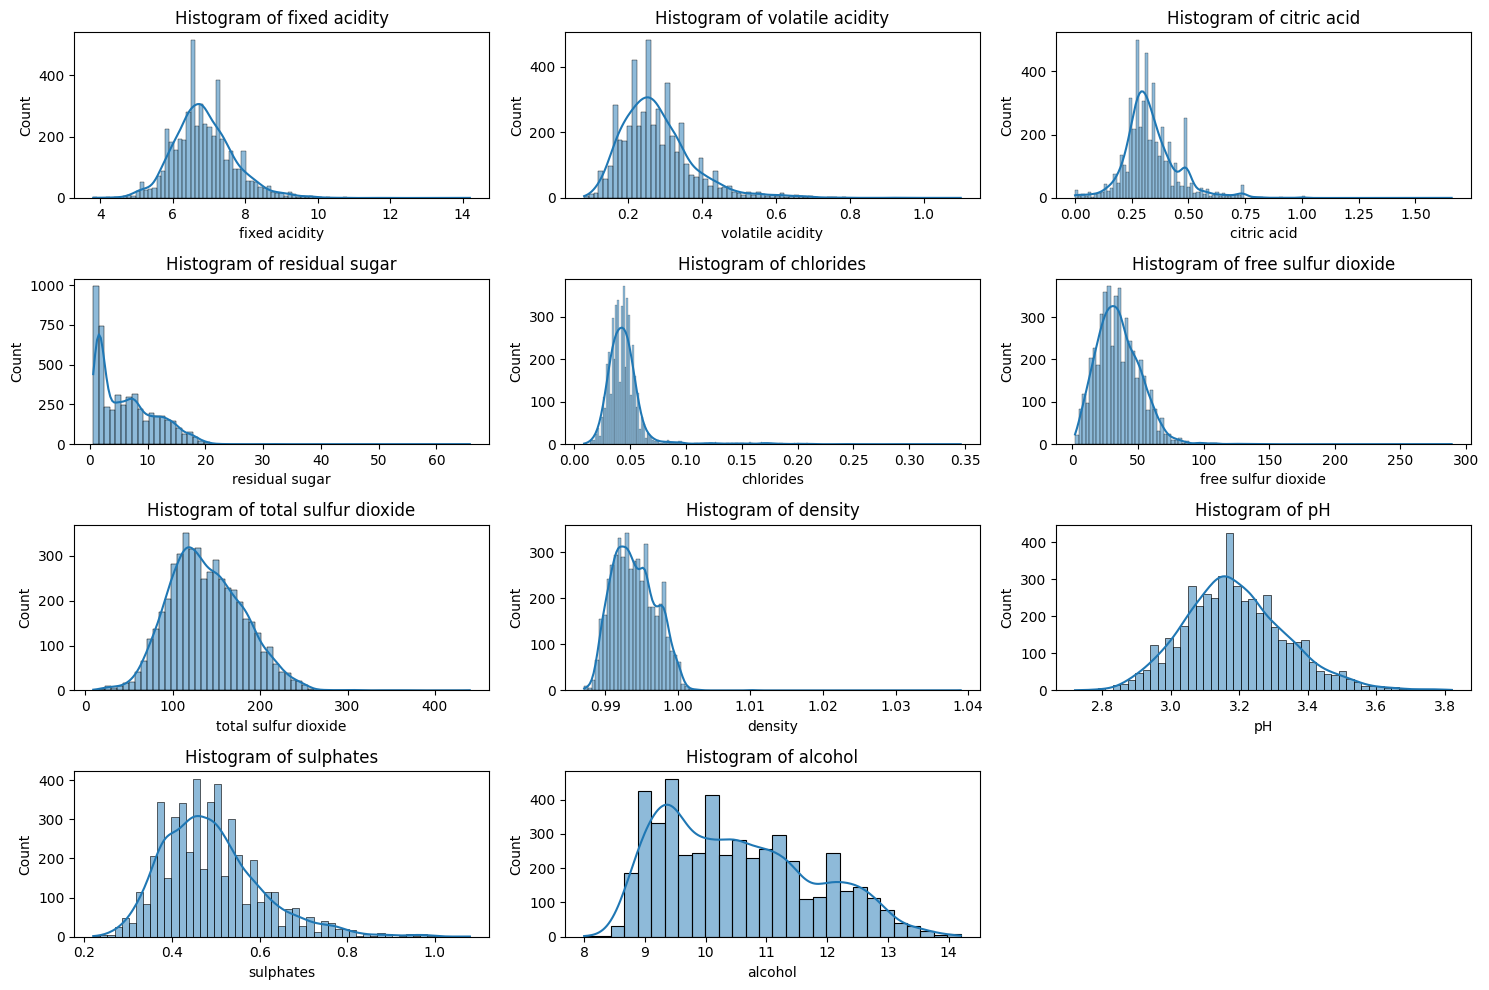

In [148]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):  # Exclude 'quality'
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

#### From this residual sugar,chlorides,free sulfur dioxide and density are left skewed 

Text(0.5, 1.0, 'Correlation Matrix')

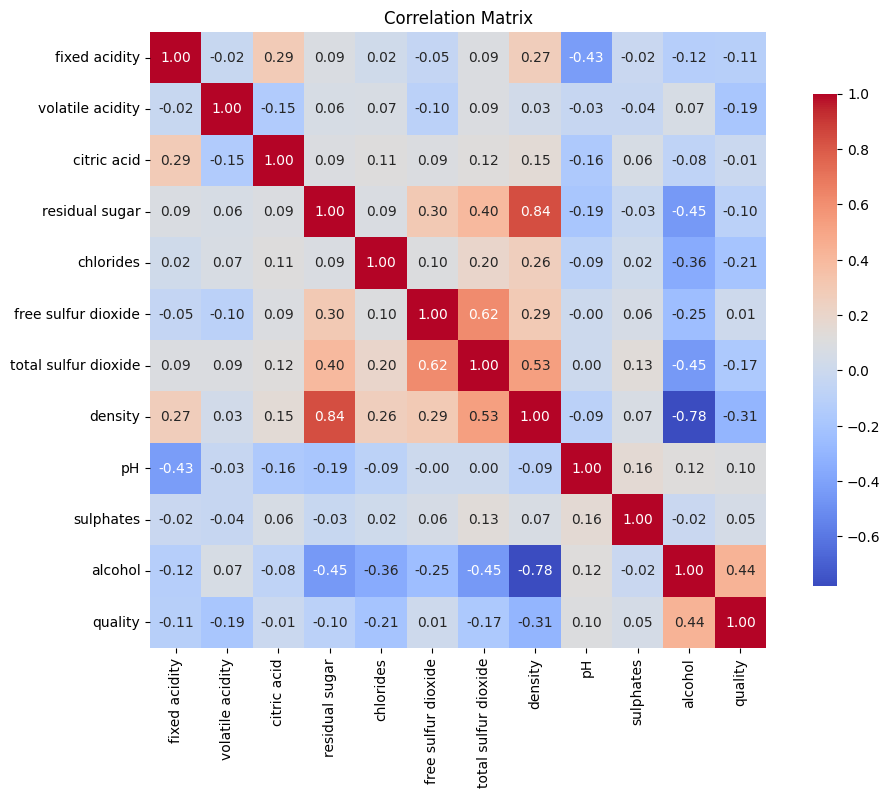

In [149]:
# 2. Correlation Matrix 
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')

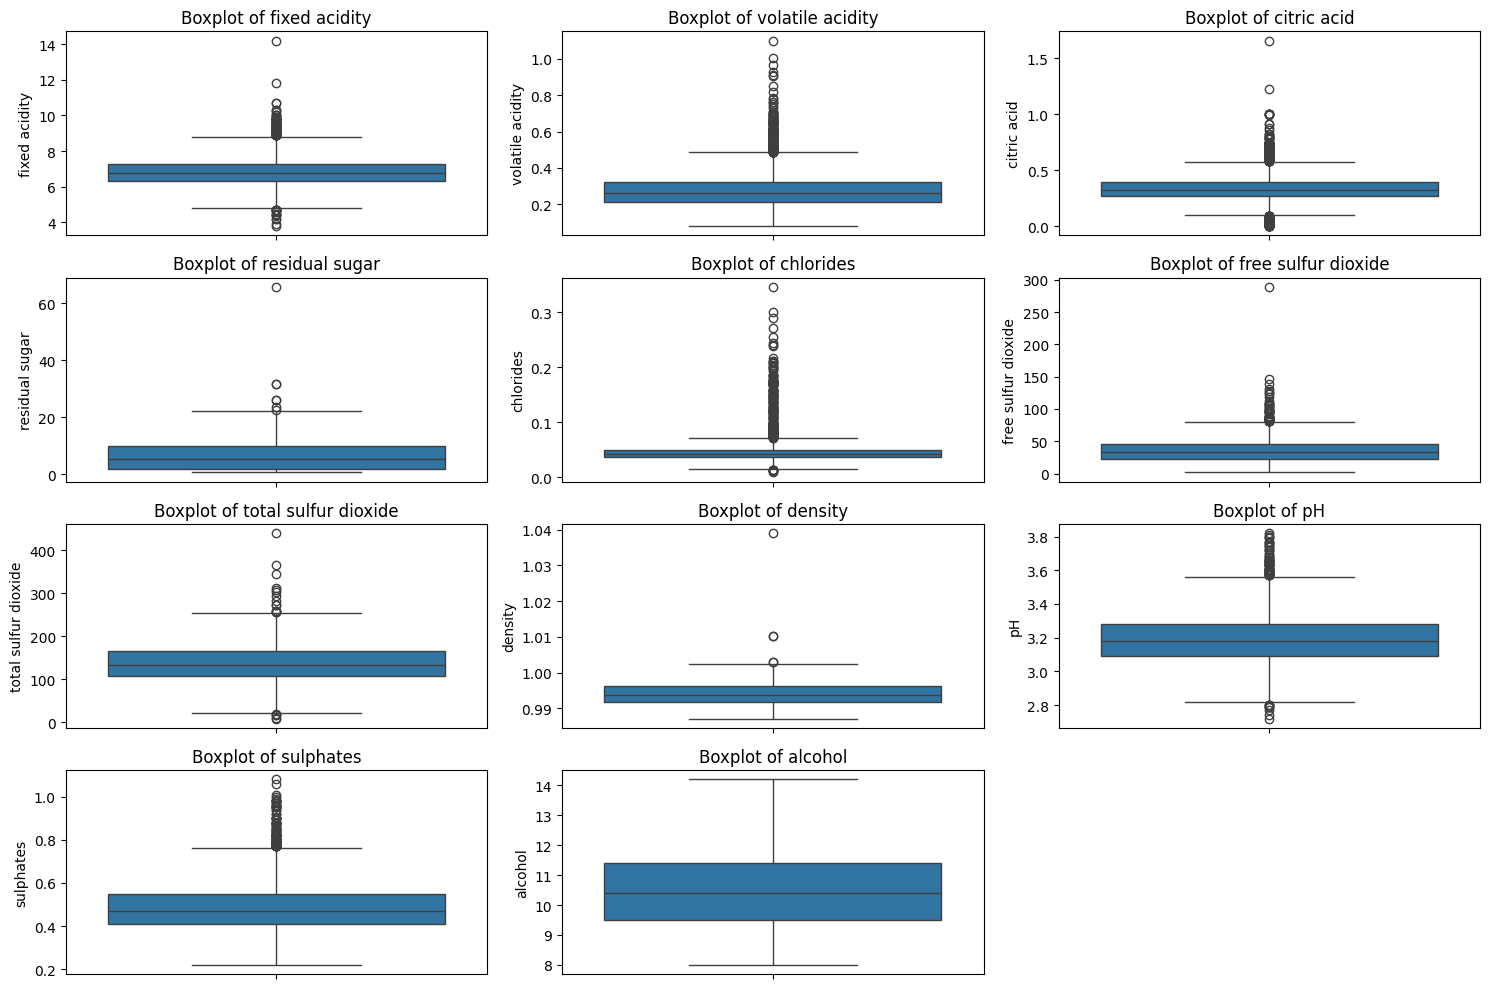

In [150]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):  # Exclude 'quality'
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

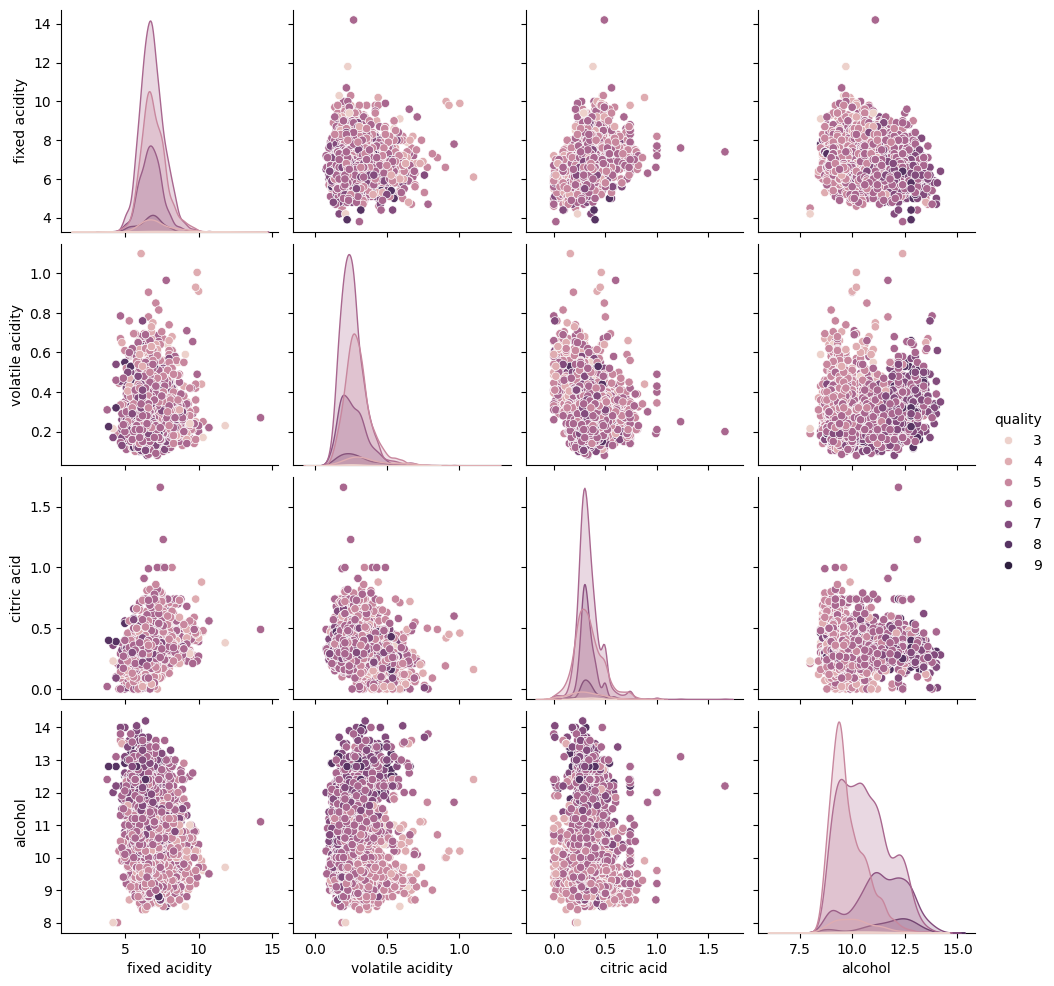

In [151]:
# Pairplot
# Pairplot for selected features to avoid clutter
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'alcohol', 'quality']
sns.pairplot(df[selected_features], hue='quality')
plt.show()

In [152]:
# Correlation with quality
quality_corrs = corr['quality'].sort_values(ascending=False)
print("Correlations with Quality:\n", quality_corrs)

Correlations with Quality:
 quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64


In [153]:
# Trend: Quality vs. key features
print("\nAverage feature values by quality:")
quality_grouped = df.groupby('quality').mean()
print(quality_grouped)


Average feature values by quality:
         fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             7.600000          0.333250     0.336000        6.392500   
4             7.129448          0.381227     0.304233        4.628221   
5             6.933974          0.302011     0.337653        7.334969   
6             6.837671          0.260564     0.338025        6.441606   
7             6.734716          0.262767     0.325625        5.186477   
8             6.657143          0.277400     0.326514        5.671429   
9             7.420000          0.298000     0.386000        4.120000   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.054300            53.325000            170.600000  0.994884   
4         0.050098            23.358896            125.279141  0.994277   
5     

In [154]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
# Remove duplicates if any
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New number of rows: {df.shape[0]}")

Number of duplicate rows: 937
Duplicates removed. New number of rows: 3961


In [155]:
# Check for outliers using IQR method   
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Outliers detected in each column:\n", outliers)
# Remove outliers
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"Outliers removed. New number of rows: {df1.shape[0]}")
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)
# Handle missing values if any
if missing_values.any():
    df = df.fillna(df.mean())
    print("Missing values filled with column means.")

Outliers detected in each column:
 fixed acidity           106
volatile acidity        133
citric acid             223
residual sugar           16
chlorides               178
free sulfur dioxide      44
total sulfur dioxide     14
density                   6
pH                       46
sulphates                96
alcohol                   0
quality                 156
dtype: int64
Outliers removed. New number of rows: 860
Missing values in each column:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## 2nd Dataset 

#### In this the dataset also we had the columns were separated by semicolon so i have used sep to distinguish between various properties 

In [156]:
df1 = pd.read_csv('winequality-red.csv', sep=';')

In [157]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [158]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [159]:
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Text(0.5, 1.0, 'Correlation Matrix for Red Wine')

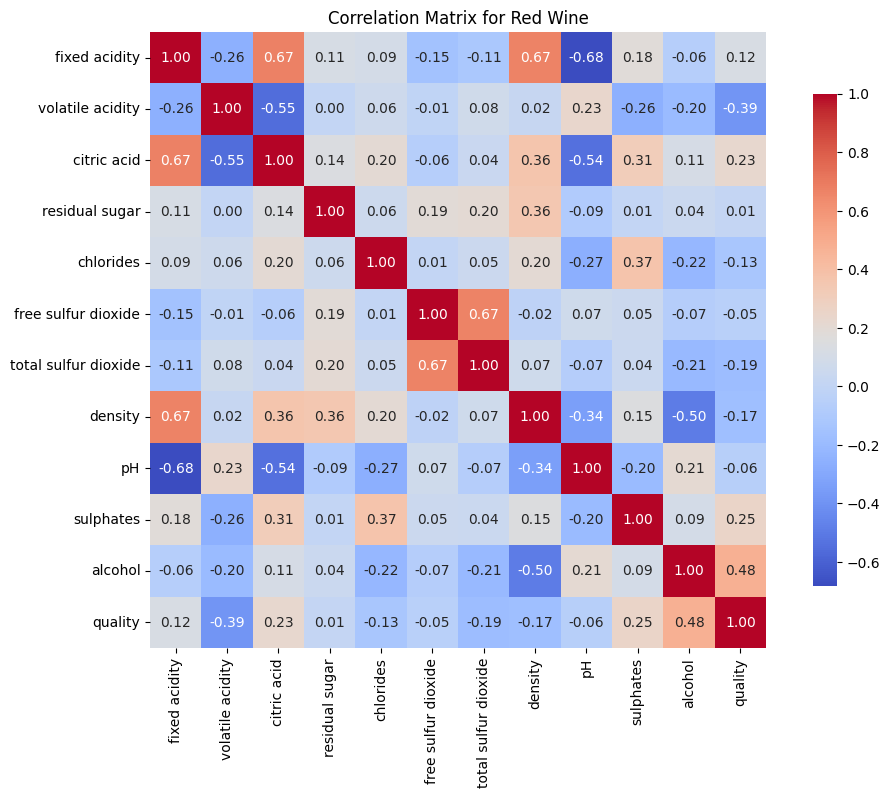

In [160]:
corr = df1.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix for Red Wine')

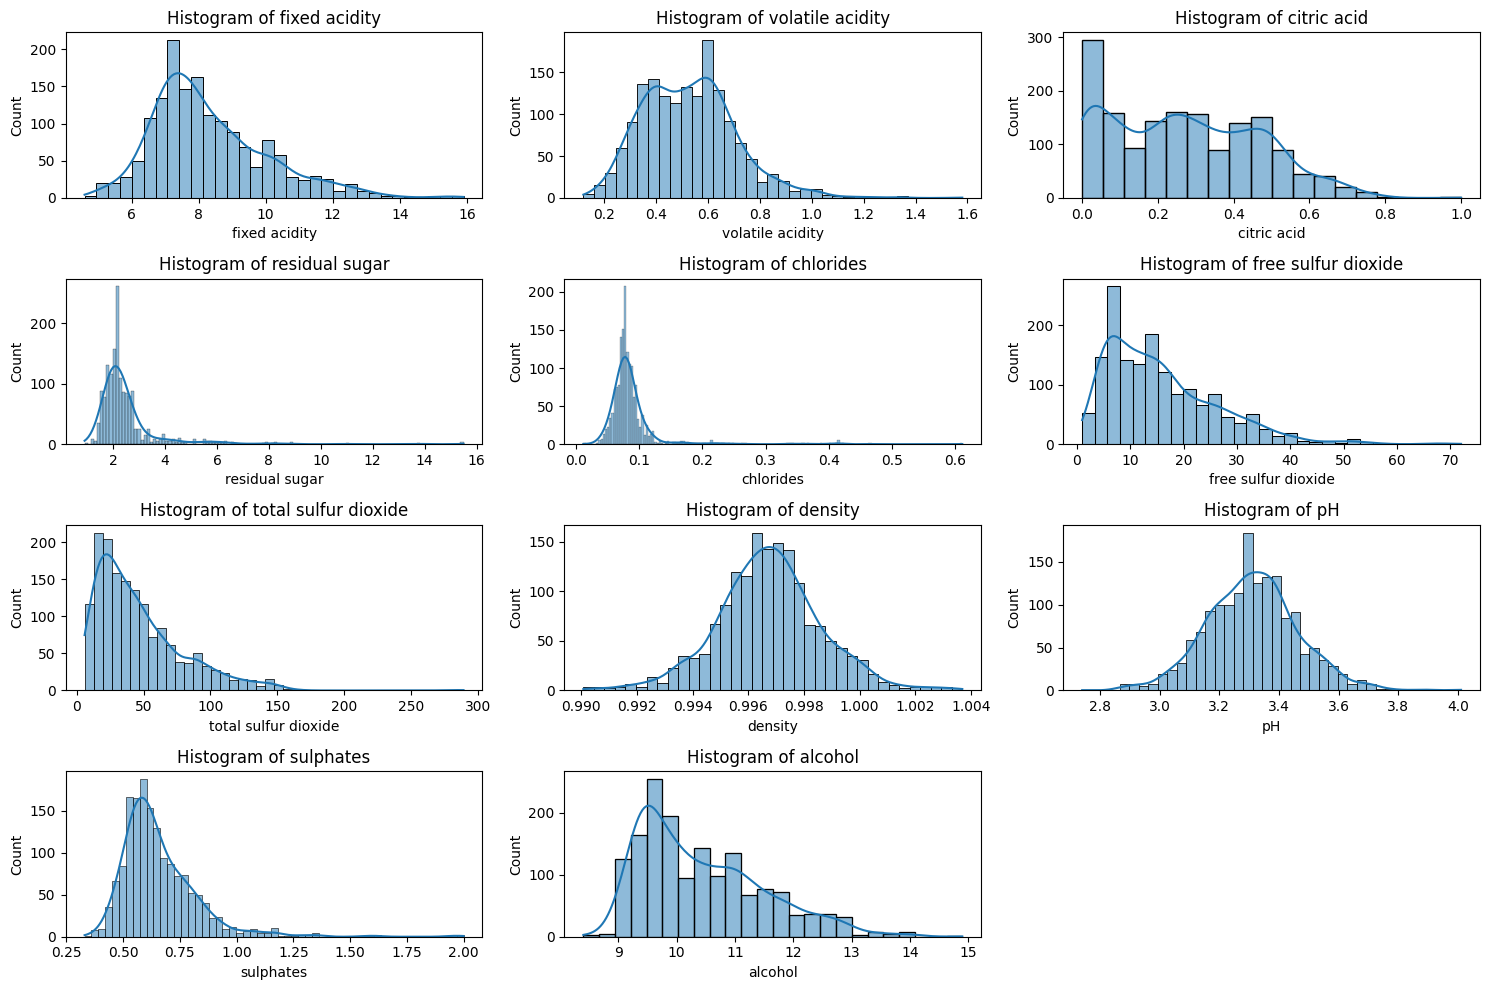

In [161]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df1.columns[:-1], 1):  # Exclude 'quality'
    plt.subplot(4, 3, i)
    sns.histplot(df1[column], kde=True)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

#### Here Residual sugar ,chlorides and total sulfur dioxide are all Left-Skewed 

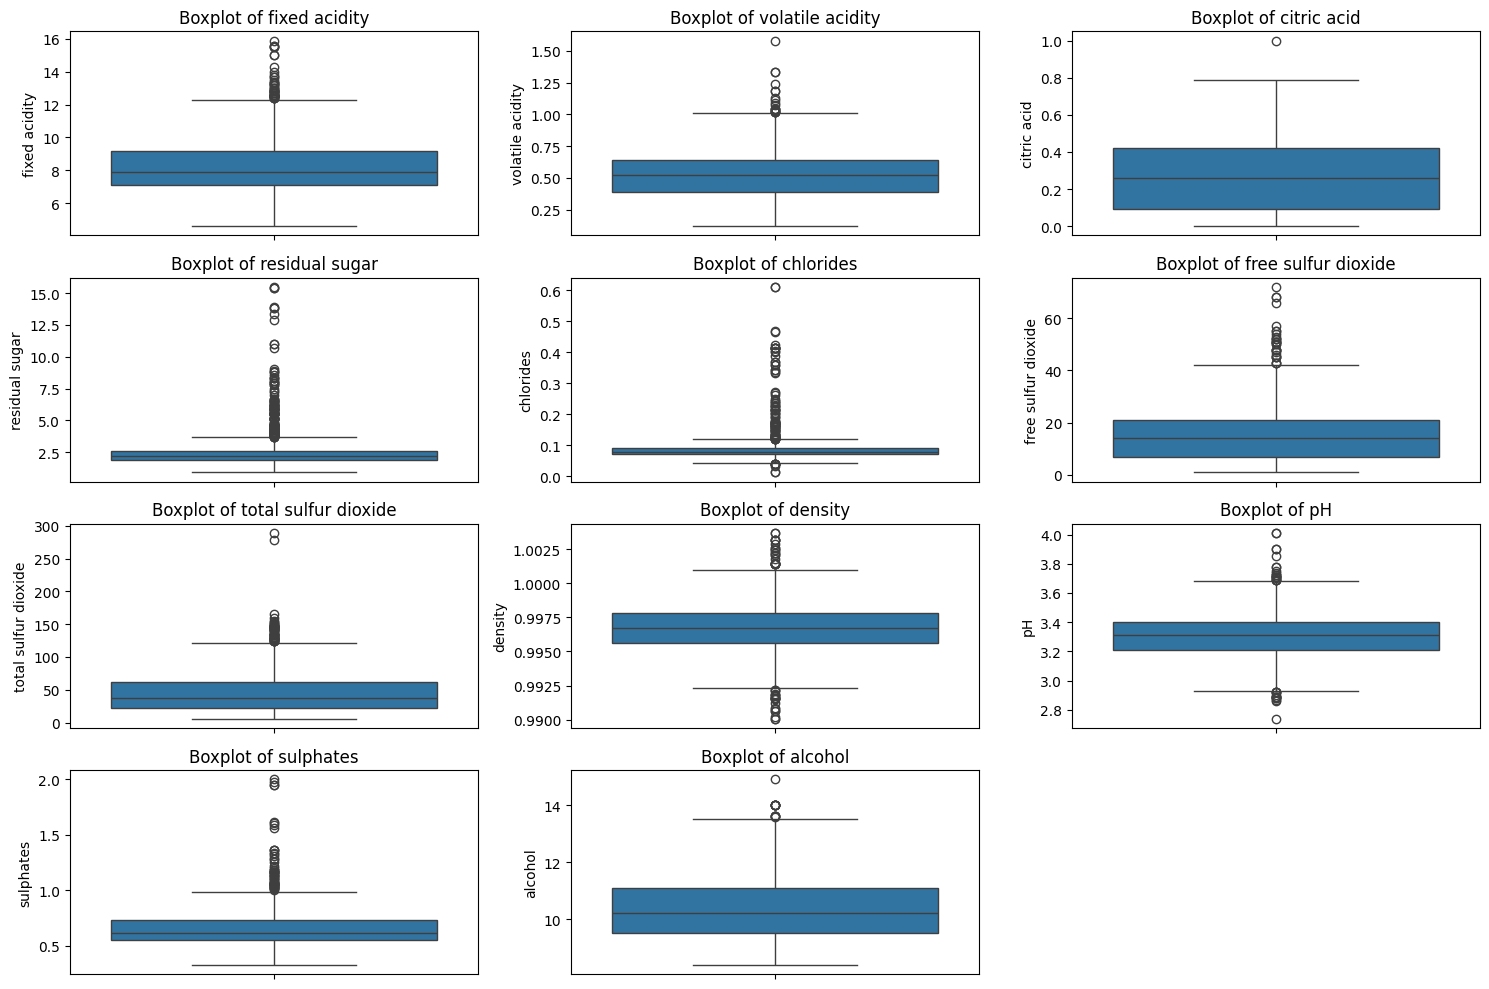

In [162]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df1.columns[:-1], 1):  # Exclude 'quality'
    plt.subplot(4, 3, i)
    sns.boxplot(y=df1[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

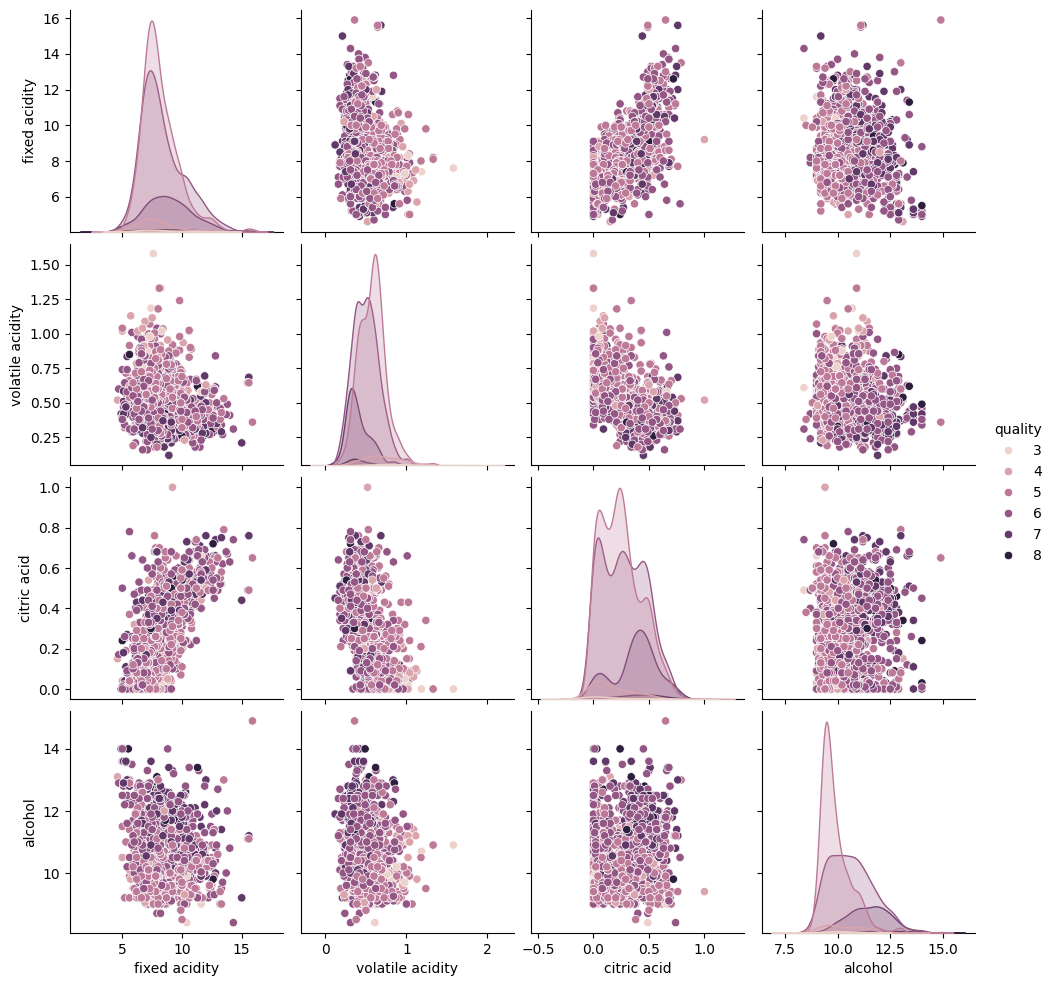

In [163]:
# Pairplot
# Pairplot for selected features to avoid clutter
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'alcohol', 'quality']
sns.pairplot(df1[selected_features], hue='quality')
plt.show()

In [164]:
# Correlation with quality
quality_corrs = corr['quality'].sort_values(ascending=False)
print("Correlations with Quality:\n", quality_corrs)

Correlations with Quality:
 quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [165]:
# Trend: Quality vs. key features
print("\nAverage feature values by quality:")
quality_grouped = df1.groupby('quality').mean()
print(quality_grouped)


Average feature values by quality:
         fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.360000          0.884500     0.171000        2.635000   
4             7.779245          0.693962     0.174151        2.694340   
5             8.167254          0.577041     0.243686        2.528855   
6             8.347179          0.497484     0.273824        2.477194   
7             8.872362          0.403920     0.375176        2.720603   
8             8.566667          0.423333     0.391111        2.577778   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.122500            11.000000             24.900000  0.997464   
4         0.090679            12.264151             36.245283  0.996542   
5         0.092736            16.983847             56.513950  0.997104   
6   

In [166]:
# Check for duplicates
duplicates = df1.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
# Remove duplicates if any
if duplicates > 0:
    df1 = df1.drop_duplicates()
    print(f"Duplicates removed. New number of rows: {df1.shape[0]}")

Number of duplicate rows: 240
Duplicates removed. New number of rows: 1359


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3131 entries, 1 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3131 non-null   float64
 1   volatile acidity      3131 non-null   float64
 2   citric acid           3131 non-null   float64
 3   residual sugar        3131 non-null   float64
 4   chlorides             3131 non-null   float64
 5   free sulfur dioxide   3131 non-null   float64
 6   total sulfur dioxide  3131 non-null   float64
 7   density               3131 non-null   float64
 8   pH                    3131 non-null   float64
 9   sulphates             3131 non-null   float64
 10  alcohol               3131 non-null   float64
 11  quality               3131 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 318.0 KB


In [168]:
# Check for outliers using IQR method   
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).sum()
print("Outliers detected in each column:\n", outliers)
# Remove outliers
df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"Outliers removed. New number of rows: {df1.shape[0]}")
# Check for missing values
missing_values = df1.isnull().sum()
print("Missing values in each column:\n", missing_values)
# Handle missing values if any
if missing_values.any():
    df1 = df1.fillna(df1.mean())
    print("Missing values filled with column means.")

Outliers detected in each column:
 fixed acidity            41
volatile acidity         19
citric acid               1
residual sugar          126
chlorides                87
free sulfur dioxide      26
total sulfur dioxide     45
density                  35
pH                       28
sulphates                55
alcohol                  12
quality                  27
dtype: int64
Outliers removed. New number of rows: 1005
Missing values in each column:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
